# _Categorical_ Data Type


`Categoricals` can only take on a limited number of possible values (categories) and <br>
can be sorted according to the custom order of the categories.

To harness `Categorical` data type in Lets-Plot you can either add a `pandas.Categotical` variable to <br>
your `pandas.DataFrame` or annotate any variable in your dataset as `Categorical` using <br>
Lets-Plot `as_discrete()` function and the `levels` parameter.


In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.mapping import as_discrete


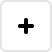
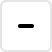
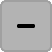
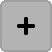
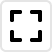
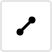
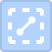
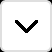
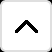
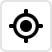
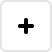
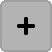
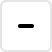
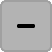
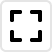
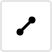
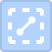
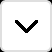
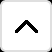
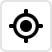

In [2]:
LetsPlot.setup_html()

In [3]:
mpg_df = pd.read_csv ("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
mpg_df.head(4)

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact


#### 1. Data Type of the "manufacturer" is `Unordered Discrete` by Default .

In [4]:
ggplot(mpg_df) + geom_bar(aes(x='manufacturer')) + coord_flip()

In [5]:
# 
# Create a list of categories sorted according to a num. of vehicles in the dataset.
# 

brands_by_count = mpg_df['manufacturer'].value_counts().index.tolist()
brands_by_count

['dodge',
 'toyota',
 'volkswagen',
 'ford',
 'chevrolet',
 'audi',
 'hyundai',
 'subaru',
 'nissan',
 'honda',
 'jeep',
 'pontiac',
 'land rover',
 'mercury',
 'lincoln']

#### 2. First Option: Add a `pandas.Categorical` Variable

In [6]:
manufacturer_cat = pd.Categorical(mpg_df['manufacturer'], categories=brands_by_count, ordered=True)
mpg_df['manufacturer_cat'] = manufacturer_cat

In [7]:
ggplot(mpg_df) + \
    geom_bar(aes(x='manufacturer_cat'),
             labels=layer_labels(['..count..']).format('..count..', 'd'),
             tooltips='none') + \
    coord_flip()

#### 3. Second Option: Annotate "manufacturer" as a `Categorical` Using `as_discrete(levels=..)` 

In [8]:
ggplot(mpg_df) + \
    geom_bar(aes(x=as_discrete('manufacturer', levels=brands_by_count)),
             labels=layer_labels(['..count..']).format('..count..', 'd'),
             tooltips='none') + \
    coord_flip()

#### 4. Faceted Plot with a `Categorical` as a Facet Variable

When the facet variable is of `Categorical` data type, plot facets are ordered according to the order of categories. 

In [9]:
ggplot(mpg_df) + \
    geom_pie(aes(fill='drv', size='..sum..')) + \
    facet_wrap(facets='manufacturer_cat', ncol=5, order=0) + \
    scale_size(range=[2, 10]) + \
    guides(size='none') + \
    theme_void()